# Возьмем распределение парето

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
from statsmodels.distributions.empirical_distribution import ECDF
%matplotlib inline

## Оно выглядит примерно так для коэффициента k = 3, x = 1 и выборки n = 100

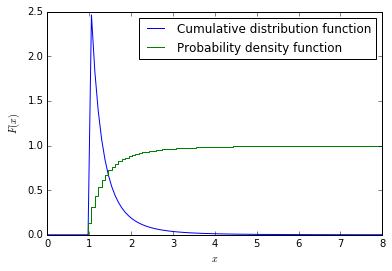

In [2]:
k = 3.
pareto_rv = sts.pareto(k)
pareto_rv.rvs(100)

x = np.linspace(0,8,100)
cdf = pareto_rv.cdf(x)
pdf = pareto_rv.pdf(x)

plt.plot(x, pdf, label='Cumulative distribution function')
plt.step(x, cdf, label='Probability density function')
plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper right')

In [3]:
# Находим и выводим EX и DX
EX = k/(k-1.)
DX = ((1./(k-1.))**2.)*k/(k-2.)
DX2 = k/((k-1.)**2.*(k-2.))
print "EX = " + str(EX)
print "DX = " + str(DX)

EX = 1.5
DX = 0.75


## Построим гистограммы выборочных средних для разных объемов выборок 

In [4]:
def gistOfPareto(n, n_bins = 10, left = 1, right = 3):
    # Лист для хранения выборочных средних
    a = []

    #Генерируем 1000 парето-выборок
    for k in range(1000):
        pareto_rv = sts.pareto(3)
        # выборка объема n; Тут = 3
        res = pareto_rv.rvs(n)
        # считаем среднее для каждой выборки
        z = 0
        for i in res:
            z += i
        z = z*1./n
        #Добавляем в список общих значений 
        a.append(z)
        
    #Гистограмма по полученным значениям и подписи
    plt.hist(a, bins = n_bins, normed=True)
    #Теоретическое
    sigma = math.sqrt(DX/n)
    norm_rv = sts.norm(loc=EX, scale=sigma)
    xm = np.linspace(left,right,100)
    pdfm = norm_rv.pdf(xm)
    plt.plot(xm, pdfm, label='pdf')
    
    plt.title('Pareto n=' + str(n) + 'hist with bins = ' + str(n_bins))
    plt.ylabel('number of samples')
    plt.xlabel('$x$')
    plt.legend(loc='best', frameon=False)
    #Далее код просто повторяется

### n = 3

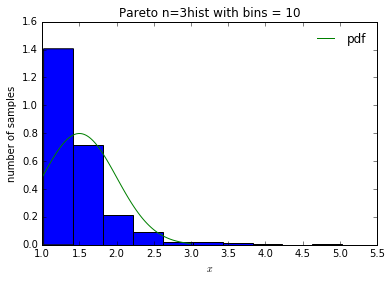

In [5]:
gistOfPareto(3)

### n = 10

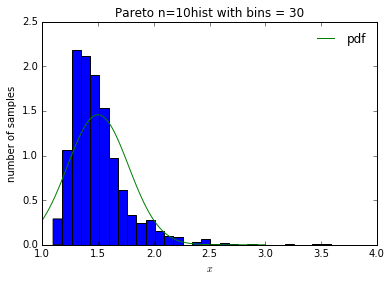

In [6]:
gistOfPareto(10, 30)

### n = 30

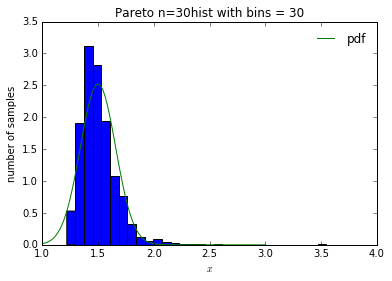

In [7]:
gistOfPareto(30, 30)

### n = 70

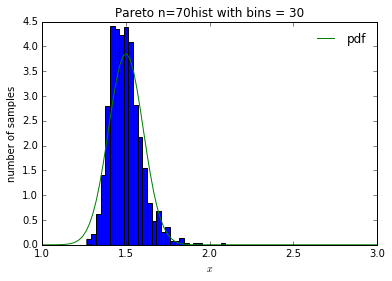

In [8]:
gistOfPareto(70, 30)

## Выводы

#### С ростом объема выборок центральная предельная теорема работает лучше.